In [1]:
from pathlib import Path
import numpy as np 
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
def plot_npz_files(filepaths):
    all_data = {}
    for filepath in filepaths:
        try:
            data = np.load(str(filepath), allow_pickle=True)
        except pickle.UnpicklingError:
            print(f"Error loading data from {filepath}. Skipping this file.")
            continue

        keys = data.files
        keys = sorted(keys, key=lambda x: ('epoch' in x, x), reverse=True)

        for idx, key in enumerate(keys):
            data_values = data[key].tolist()  
            if key not in all_data:
                all_data[key] = data_values
            else:
                all_data[key]['steps'].extend(data_values['steps'])
                all_data[key]['values'].extend(data_values['values'])
    for k, v in all_data.items():             
        data_frame = pd.DataFrame.from_dict(all_data[k])
        sns.lineplot(x="steps", y="values", data=data_frame, label=k)   
        plt.show()

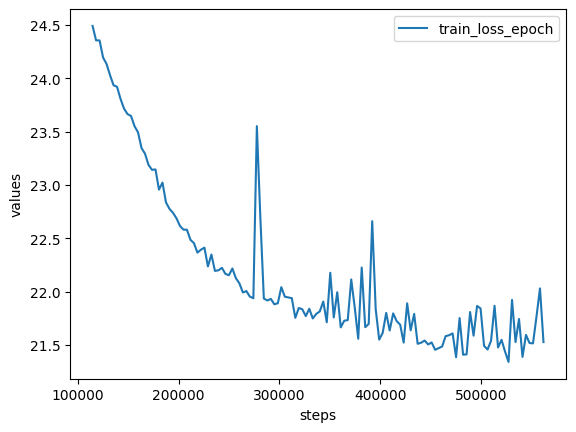

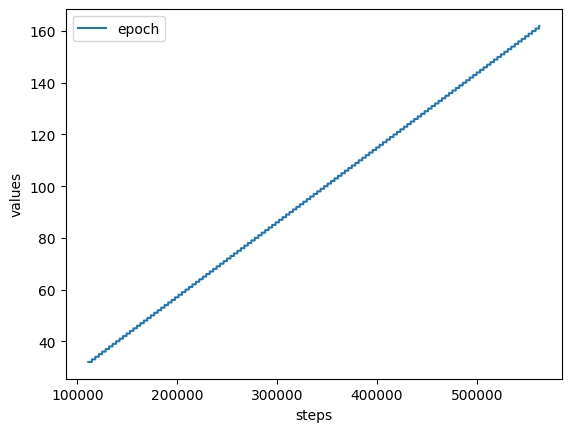

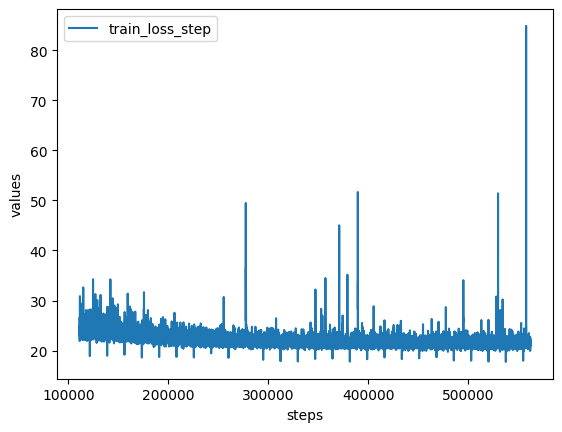

In [9]:
npz_directory_current=Path('/home/debian/jz/Mari_Models/NucleiCloud/')
npz_file_current = [npz_directory_current/file for file in os.listdir(npz_directory_current) if file.endswith('.npz')][0]

filepaths = [npz_file_current]
plot_npz_files(filepaths)